In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b1c7d78334a300f0d492588c2a850875


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | atuona
Processing Record 2 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 13 | hilo
Processing Record 4 of Set 13 | pangnirtung
Processing Record 5 of Set 13 | barrow
Processing Record 6 of Set 13 | thompson
Processing Record 7 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 13 | vaini
Processing Record 9 of Set 13 | cape town
Processing Record 10 of Set 13 | codajas
Processing Record 11 of Set 13 | arraial do cabo
Processing Record 12 of Set 13 | jamestown
Processing Record 13 of Set 13 | saquarema
Processing Record 14 of Set 13 | bambous virieux
Processing Record 15 of Set 13 | nikolskoye
Processing Record 16 of Set 13 | bredasdorp
Processing Record 17 of Set 13 | alihe
Processing Record 18 of Set 13 | punta arenas
Processing Record 19 of Set 13 | hay river
Processing Record 20 of Set 13 | hithadhoo
Processing Record 21 of Set 13 | sever

Processing Record 33 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 34 of Set 16 | george town
Processing Record 35 of Set 16 | great yarmouth
Processing Record 36 of Set 16 | baringo
Processing Record 37 of Set 16 | bathsheba
Processing Record 38 of Set 16 | angra
City not found. Skipping...
Processing Record 39 of Set 16 | azangaro
Processing Record 40 of Set 16 | touros
Processing Record 41 of Set 16 | ca mau
Processing Record 42 of Set 16 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 16 | gweta
Processing Record 44 of Set 16 | san quintin
Processing Record 45 of Set 16 | ostrovnoy
Processing Record 46 of Set 16 | tlacotepec
Processing Record 47 of Set 16 | lorengau
Processing Record 48 of Set 16 | willowmore
Processing Record 49 of Set 16 | tianpeng
Processing Record 50 of Set 16 | bathurst
Processing Record 1 of Set 17 | georgetown
Processing Record 2 of Set 17 | asau
Processing Record 3 of Set 17 | mumford
Processing Record 4 of Set 17 

Processing Record 18 of Set 20 | harper
Processing Record 19 of Set 20 | kualakapuas
Processing Record 20 of Set 20 | neijiang
Processing Record 21 of Set 20 | havre-saint-pierre
Processing Record 22 of Set 20 | rio gallegos
Processing Record 23 of Set 20 | ust-koksa
Processing Record 24 of Set 20 | kavaratti
Processing Record 25 of Set 20 | asfi
Processing Record 26 of Set 20 | kenora
Processing Record 27 of Set 20 | luderitz
Processing Record 28 of Set 20 | chapais
Processing Record 29 of Set 20 | oberstdorf
Processing Record 30 of Set 20 | jarjis
City not found. Skipping...
Processing Record 31 of Set 20 | hamilton
Processing Record 32 of Set 20 | mogadishu
Processing Record 33 of Set 20 | ponta do sol
Processing Record 34 of Set 20 | yulara
Processing Record 35 of Set 20 | fairbanks
Processing Record 36 of Set 20 | shelton
Processing Record 37 of Set 20 | lumajang
Processing Record 38 of Set 20 | mweka
Processing Record 39 of Set 20 | suslovo
Processing Record 40 of Set 20 | zongul

Processing Record 3 of Set 24 | pangai
Processing Record 4 of Set 24 | santa isabel do rio negro
Processing Record 5 of Set 24 | shirokiy
Processing Record 6 of Set 24 | kahului
Processing Record 7 of Set 24 | jutai
Processing Record 8 of Set 24 | helong
Processing Record 9 of Set 24 | roald
Processing Record 10 of Set 24 | parkes
Processing Record 11 of Set 24 | byron bay
Processing Record 12 of Set 24 | fez
Processing Record 13 of Set 24 | marsh harbour
Processing Record 14 of Set 24 | sao gabriel da cachoeira
Processing Record 15 of Set 24 | broken hill
Processing Record 16 of Set 24 | samusu
City not found. Skipping...
Processing Record 17 of Set 24 | teya
Processing Record 18 of Set 24 | oriximina
Processing Record 19 of Set 24 | ayolas
Processing Record 20 of Set 24 | sorland
Processing Record 21 of Set 24 | andenes
Processing Record 22 of Set 24 | san miguel
Processing Record 23 of Set 24 | kurchum
Processing Record 24 of Set 24 | parry sound
Processing Record 25 of Set 24 | ino

In [11]:
len(city_data)

573

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.31,74,3,17.47,PF,2022-01-26 00:30:19
1,Hilo,19.7297,-155.0900,78.53,67,75,9.22,US,2022-01-26 00:30:20
2,Pangnirtung,66.1451,-65.7125,-12.03,99,100,2.26,CA,2022-01-26 00:30:20
3,Barrow,71.2906,-156.7887,-5.78,77,40,20.71,US,2022-01-26 00:27:32
4,Thompson,55.7435,-97.8558,-9.24,70,75,8.05,CA,2022-01-26 00:30:21
5,Vaini,-21.2000,-175.2000,86.16,74,20,9.22,TO,2022-01-26 00:30:21
6,Cape Town,-33.9258,18.4232,68.41,76,0,5.01,ZA,2022-01-26 00:27:48
7,Codajas,-3.8367,-62.0569,74.82,97,100,2.13,BR,2022-01-26 00:30:22
8,Arraial Do Cabo,-22.9661,-42.0278,76.46,87,15,20.71,BR,2022-01-26 00:29:37
9,Jamestown,42.0970,-79.2353,18.72,85,100,8.05,US,2022-01-26 00:30:22


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-01-26 00:30:19,-9.8000,-139.0333,78.31,74,3,17.47
1,Hilo,US,2022-01-26 00:30:20,19.7297,-155.0900,78.53,67,75,9.22
2,Pangnirtung,CA,2022-01-26 00:30:20,66.1451,-65.7125,-12.03,99,100,2.26
3,Barrow,US,2022-01-26 00:27:32,71.2906,-156.7887,-5.78,77,40,20.71
4,Thompson,CA,2022-01-26 00:30:21,55.7435,-97.8558,-9.24,70,75,8.05
5,Vaini,TO,2022-01-26 00:30:21,-21.2000,-175.2000,86.16,74,20,9.22
6,Cape Town,ZA,2022-01-26 00:27:48,-33.9258,18.4232,68.41,76,0,5.01
7,Codajas,BR,2022-01-26 00:30:22,-3.8367,-62.0569,74.82,97,100,2.13
8,Arraial Do Cabo,BR,2022-01-26 00:29:37,-22.9661,-42.0278,76.46,87,15,20.71
9,Jamestown,US,2022-01-26 00:30:22,42.0970,-79.2353,18.72,85,100,8.05


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

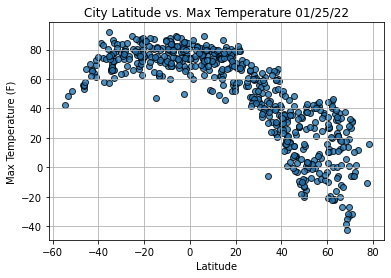

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

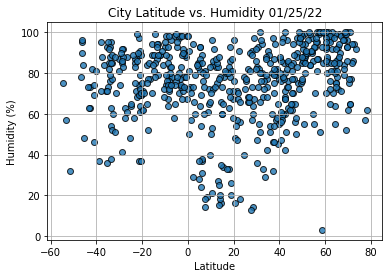

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

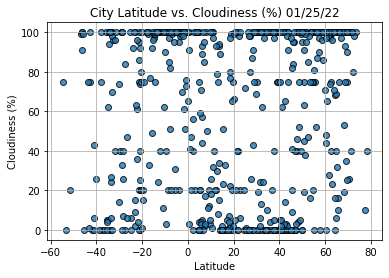

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

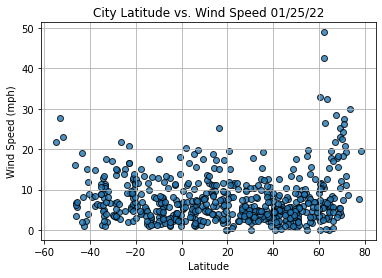

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2022-01-26 00:30:24
Lat                      -34.5322
Lng                       20.0403
Max Temp                    65.52
Humidity                       82
Cloudiness                    100
Wind Speed                   4.61
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hilo,US,2022-01-26 00:30:20,19.7297,-155.0900,78.53,67,75,9.22
2,Pangnirtung,CA,2022-01-26 00:30:20,66.1451,-65.7125,-12.03,99,100,2.26
3,Barrow,US,2022-01-26 00:27:32,71.2906,-156.7887,-5.78,77,40,20.71
4,Thompson,CA,2022-01-26 00:30:21,55.7435,-97.8558,-9.24,70,75,8.05
9,Jamestown,US,2022-01-26 00:30:22,42.0970,-79.2353,18.72,85,100,8.05


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

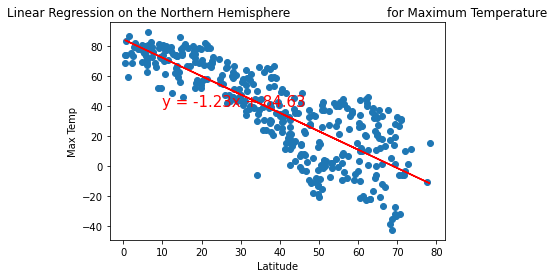

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

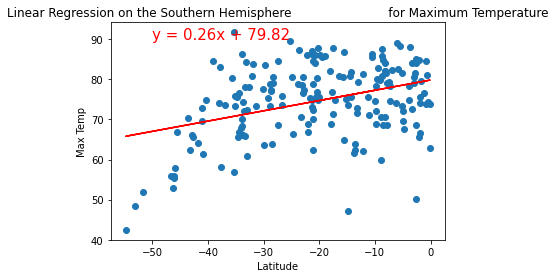

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

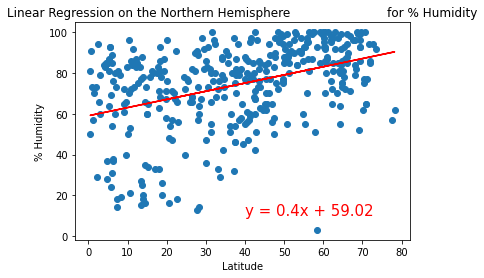

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

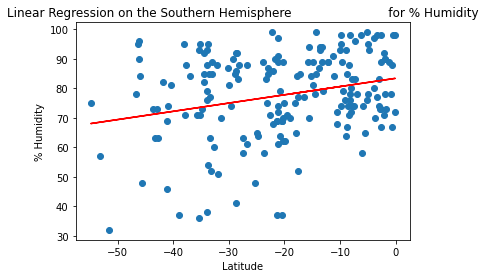

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

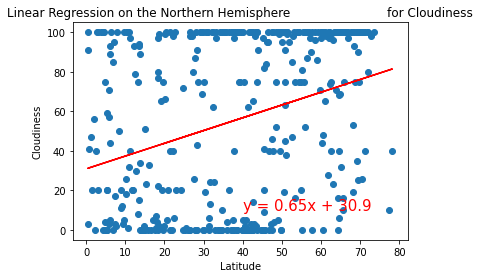

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

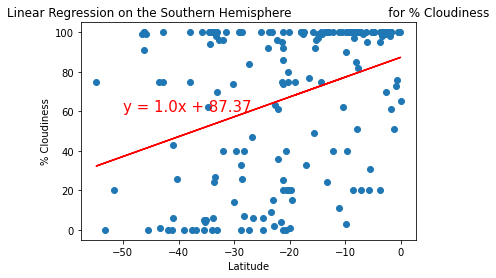

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

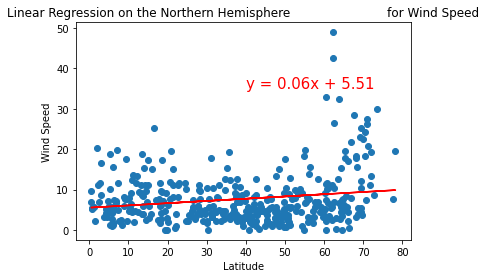

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

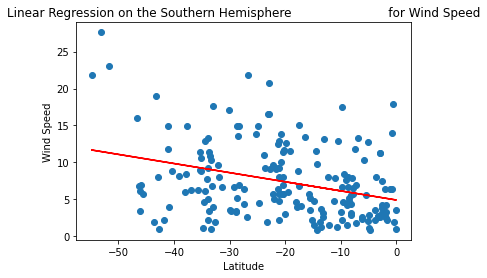

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))